[View in Colaboratory](https://colab.research.google.com/github/charlieLehman/mlmath/blob/master/mlmath_HW07.ipynb)

# Dependencies

In [0]:
from scipy.io import loadmat
from scipy.integrate import quad
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline
from tqdm import tqdm
from IPython.display import display, Math, Latex, HTML
from google.colab.output._publish import javascript
from scipy.special import legendre
url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"

import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)
plt.style.use('fivethirtyeight')

# Utilities

In [0]:
class sdsolve:
    def __init__(self, H, b, tol, maxiter, solver='Conjugate Gradient'):
        self.H = H
        self.N = b.shape[0]
        self.b = b
        self.tol = tol
        self.maxiter = maxiter
        self.x_hist = []
        self.solver = solver
        
    def solve(self, x):
        x = x.copy()
        if self.solver == 'Conjugate Gradient':
            x_h, k = self._conjugate_gradient(x)
        elif self.solver == 'Steepest Descent':
            x_h, k = self._sgd_v2(x)
        
        print("{} solved in {} steps with tol of {:.2E} and error of {:.2E}".format(self.solver, k, *self.x_hist[-1][1:]))
        return x_h, k
        
    def _sgd_v2(self, x):
        r = self.b - self.H@x
        for k in range(self.maxiter):
            q = self.H@r
            error = np.linalg.norm(r)/np.linalg.norm(b)
            self.x_hist.append((x.copy(), error, np.linalg.norm(self.H@x-self.b)))
            a = r.T@r/(r.T@q)
            x += a*r
            r -= a*q
            if  error < self.tol:
                break
        return x, k
    
    def _conjugate_gradient(self, x):
        r = self.b - self.H@x
        d = r
        for k in range(self.maxiter):
            error = np.linalg.norm(r)/np.linalg.norm(b)
            self.x_hist.append((x.copy(), error, np.linalg.norm(self.H@x-self.b)))
            a = r.T@r/(d.T@self.H@d)
            x += a*d
            r_ = r - a*self.H@d
            beta = r_.T@r_/(r.T@r)
            d = r_ + beta*d
            if  error < self.tol:
                break
            r = r_
        return x, k

In [0]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

# 1.

With the focus on methods solely reliant on linear algebra complete, our attention has be directed to methods grounded in probability.  An very brief and comprehensive review of the fundamental structure of how to construct and solve problems consisting of random numbers.  The tools that are used involve the relationship between random vectors and their moments: mean and variance.  In this structure, we are able to draw many parlallels to solutions presented in the linear algebra portion of the class.  With both of these understandings a method we have transitioned into is Expectation Maximization.

# 2.

Conjugate Gradient solved in 2 steps with tol of 7.85E-17 and error of 3.33E-16


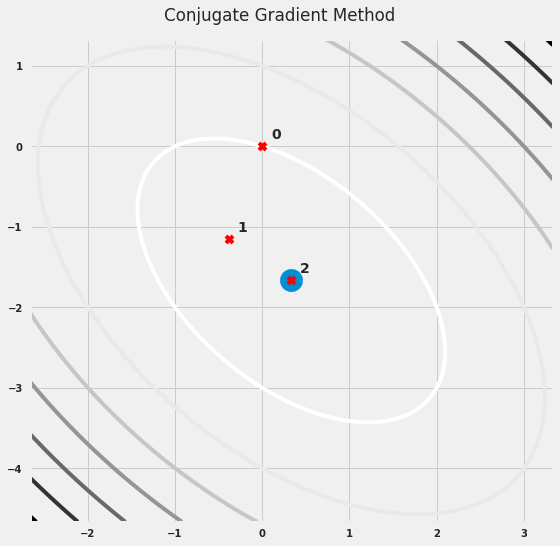

In [11]:
H = np.array([[2, 1], [1, 2]])
b = np.array([[-1], [-3]])
cg = sdsolve(H, b, 1e-6, 1000, 'Conjugate Gradient')
(x_hat, k) = cg.solve(np.zeros((2,1)))


f = lambda x: 0.5*x.T@H@x-b.T@x
ei, v = np.linalg.eig(H)
x_star = np.linalg.inv(H)@b
l = 3
x_ = np.linspace(-l,l,300)
ux, uy = np.meshgrid(x_+x_star[0],x_+x_star[1])
x = np.stack((ux.reshape(-1), uy.reshape(-1)), 1)
y = np.array(list(map(f,x))).reshape(300,300)
fig, ax = plt.subplots(1, figsize=(8,8))
ax.contour(ux, uy, y)
ax.scatter(*x_star, s=500, zorder=8)
for n in range(len(cg.x_hist)):
    x = cg.x_hist[n][0]
    ax.scatter(*x, marker='x', c='red', zorder=9)
    ax.annotate(str(n), xy=(x[0][0]+0.1, x[1][0]+0.1))
fig.suptitle('Conjugate Gradient Method')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    


# 3.

Steepest Descent solved in 277 steps with tol of 9.55E-07 and error of 2.92E-05
Conjugate Gradient solved in 57 steps with tol of 9.04E-07 and error of 2.77E-05


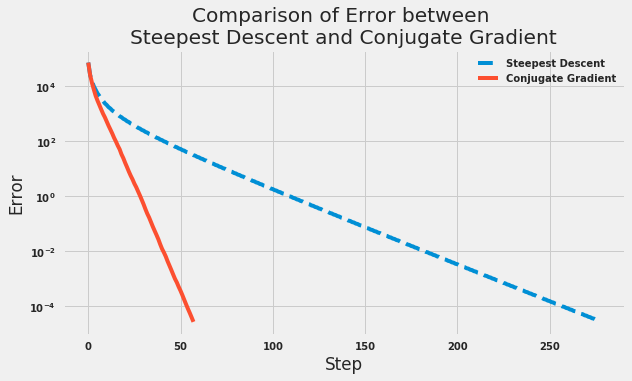

In [12]:
data = loadmat('hw06p6_data.mat')
H, b = data['H'], data['b']
sd = sdsolve(H, b, 1e-6, 1000, 'Steepest Descent')
x_0 = np.random.randn(1000,1)
(x_hat, k) = sd.solve(x_0)
cg = sdsolve(H, b, 1e-6, 1000, 'Conjugate Gradient')
(x_hat, k) = cg.solve(x_0)
sder = np.array(sd.x_hist)
cger = np.array(cg.x_hist)
plt.figure(figsize=(9,6))
plt.semilogy(sder[:,2], '--', label=sd.solver)
plt.semilogy(cger[:,2], label=cg.solver)
plt.legend()
plt.ylabel('Error')
plt.xlabel('Step')
plt.title('Comparison of Error between \nSteepest Descent and Conjugate Gradient')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
